In [1]:
#  Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [2]:
# loadmat aux function to load the matlab save files
# from: https://stackoverflow.com/review/suggested-edits/21667510

import scipy.io as spio

def loadmat(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    '''
    def _check_keys(d):
        '''
        checks if entries in dictionary are mat-objects. If yes
        todict is called to change them to nested dictionaries
        '''
        for key in d:
            if isinstance(d[key], spio.matlab.mio5_params.mat_struct):
                d[key] = _todict(d[key])
        return d

    def _has_struct(elem):
        """Determine if elem is an array and if any array item is a struct"""
        return isinstance(elem, np.ndarray) and any(isinstance(
                    e, scipy.io.matlab.mio5_params.mat_struct) for e in elem)

    def _todict(matobj):
        '''
        A recursive function which constructs from matobjects nested dictionaries
        '''
        d = {}
        for strg in matobj._fieldnames:
            elem = matobj.__dict__[strg]
            if isinstance(elem, spio.matlab.mio5_params.mat_struct):
                d[strg] = _todict(elem)
            elif _has_struct(elem):
                d[strg] = _tolist(elem)
            else:
                d[strg] = elem
        return d

    def _tolist(ndarray):
        '''
        A recursive function which constructs lists from cellarrays
        (which are loaded as numpy ndarrays), recursing into the elements
        if they contain matobjects.
        '''
        elem_list = []
        for sub_elem in ndarray:
            if isinstance(sub_elem, spio.matlab.mio5_params.mat_struct):
                elem_list.append(_todict(sub_elem))
            elif _has_struct(sub_elem):
                elem_list.append(_tolist(sub_elem))
            else:
                elem_list.append(sub_elem)
        return elem_list
    data = scipy.io.loadmat(filename, struct_as_record=False, squeeze_me=True)
    return _check_keys(data)

In [3]:
# Matlab code conversion

# Read matlab file instead of excelfile (easier conversion)
data = loadmat('matlab.mat')

In [4]:
data['data']['load']['limit'][0]

array([[27.624915 , 11.049966 ,  2.7624915,  2.7624915,  0.       ,
         0.       ,  0.5      ,  0.6      ,  0.       ,  4.5      ],
       [25.594785 , 10.237914 ,  2.5594785,  2.5594785,  0.       ,
         0.       ,  0.5      ,  0.6      ,  0.       ,  4.5      ],
       [24.058485 ,  9.623394 ,  2.4058485,  2.4058485,  0.       ,
         0.       ,  0.5      ,  0.6      ,  0.       ,  4.5      ],
       [23.55183  ,  9.420732 ,  2.355183 ,  2.355183 ,  0.       ,
         0.       ,  0.5      ,  0.6      ,  0.       ,  4.5      ],
       [23.508765 ,  9.403506 ,  2.3508765,  2.3508765,  0.       ,
         0.       ,  0.5      ,  0.6      ,  0.       ,  4.5      ],
       [23.76297  ,  9.505188 ,  2.376297 ,  2.376297 ,  0.       ,
         0.       ,  0.5      ,  0.6      ,  0.       ,  4.5      ],
       [24.714585 ,  9.885834 ,  2.4714585,  2.4714585,  0.       ,
         0.       ,  0.5      ,  0.6      ,  0.       ,  4.5      ],
       [26.378055 , 10.551222 ,  2.637805

In [5]:
import procsimulator
import os

from procsimulator.CommunityGenerator import CommunityGenerator
from procsimulator.ConsumptionGenerator import ConsumptionGenerator

from procsimulator.DataFromSmile import DataFromSmile
from procsimulator.DataFromTomorrow import DataFromTomorrow
from procsimulator.RenewableEnergyGenerator import RenewableEnergyGenerator
from procsimulator.CommunityGenerator import CommunityGenerator

In [6]:
current_path = os.getcwd()

path_steps_seconds = os.path.join(current_path, "output/house")
path_steps_minutes = "output/minute"
path_steps_after_first = "output/afteroptimization"
path_steps_after_second = "output/aftersecoptimization"

config_files_path = "output/house"

cg = ConsumptionGenerator("data.json", path_steps_seconds, path_steps_minutes)
#cg.execute("1", "houses", True, False)

Renewable Energy Generator
Calculating the contracted power of the community
energy contracted: 14950.0


C:\Users\Nuno.Velosa.CORP\OneDrive - Unipartner IT Services, S.A\Desktop\eso_project\venv\lib\site-packages\pandas\io\parsers\base_parser.py:1055: FutureWarning: 
        Use pd.to_datetime instead.

  return generic_parser(date_parser, *date_cols)


                    Date  PV_Production       Demand  Wind_Production  \
0    2022-10-06 00:00:00            0.0  3513.281667       2990.00000   
1    2022-10-06 00:01:00            0.0  4071.671667       2990.00000   
2    2022-10-06 00:02:00            0.0  4127.468333       2990.00000   
3    2022-10-06 00:03:00            0.0  4115.288333       2990.00000   
4    2022-10-06 00:04:00            0.0  4106.603333       2990.00000   
...                  ...            ...          ...              ...   
1434 2022-10-06 23:54:00            0.0   895.000000       1842.82013   
1435 2022-10-06 23:55:00            0.0   895.000000       1842.82013   
1436 2022-10-06 23:56:00            0.0   895.000000       1842.82013   
1437 2022-10-06 23:57:00            0.0   895.000000       1842.82013   
1438 2022-10-06 23:58:00            0.0   895.000000       1842.82013   

      Production  
0     2990.00000  
1     2990.00000  
2     2990.00000  
3     2990.00000  
4     2990.00000  
...      

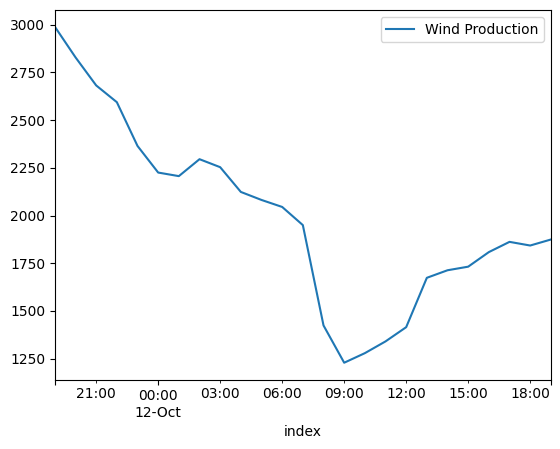

In [7]:
pv_dat = DataFromSmile("https://ems.prsma.com/solcast/public/Fazendinha_solcast-radiation-historical_30min.csv")
wind_dat = DataFromTomorrow("https://api.tomorrow.io/v4/timelines?location=-73.98529171943665,40.75872069597532&fields=pressureSurfaceLevel,pressureSeaLevel,precipitationIntensity,precipitationType,windSpeed,windGust,windDirection,temperature,temperatureApparent,cloudCover,cloudBase,cloudCeiling,weatherCode&timesteps=1h&units=metric&apikey=Yckmp3vREbJqyprWGGiTOC1pVaAYO0ZT")
reg = RenewableEnergyGenerator(cg, pv_dat, wind_dat, cg.path_steps_minutes)

reg.execute()

In [8]:
cmg = CommunityGenerator(cg.path_steps_seconds, cg.path_steps_minutes)
cmg.execute()

Calculating netload of the community


In [9]:
data['data']['load']['limit'][1]

array([[4.04042175, 1.6161687 , 0.40404218, 0.40404218, 0.        ,
        0.        , 0.5       , 0.6       , 0.        , 4.5       ],
       [3.77700975, 1.5108039 , 0.37770097, 0.37770097, 0.        ,
        0.        , 0.5       , 0.6       , 0.        , 4.5       ],
       [3.624993  , 1.4499972 , 0.3624993 , 0.3624993 , 0.        ,
        0.        , 0.5       , 0.6       , 0.        , 4.5       ],
       [3.59686575, 1.4387463 , 0.35968658, 0.35968658, 0.        ,
        0.        , 0.5       , 0.6       , 0.        , 4.5       ],
       [3.68151075, 1.4726043 , 0.36815107, 0.36815107, 0.        ,
        0.        , 0.5       , 0.6       , 0.        , 4.5       ],
       [3.88089225, 1.5523569 , 0.38808922, 0.38808922, 0.        ,
        0.        , 0.5       , 0.6       , 0.        , 4.5       ],
       [4.47363   , 1.789452  , 0.447363  , 0.447363  , 0.        ,
        0.        , 0.5       , 0.6       , 0.        , 4.5       ],
       [5.770359  , 2.3081436 , 0.5770359

In [10]:
pv_df = pd.read_csv(path_steps_minutes + '/netload.csv', sep=';')
pv_df.columns = ['Date', 'Demand', 'PV_Production', 'Wind_Production', 'Production', 'Netload']
pv_df['Date'] = pd.to_datetime(pv_df['Date'])
print(pv_df)

                    Date       Demand  PV_Production  Wind_Production  \
0    2022-10-06 00:00:00  3513.281667            0.0       2990.00000   
1    2022-10-06 00:01:00  4071.671667            0.0       2990.00000   
2    2022-10-06 00:02:00  4127.468333            0.0       2990.00000   
3    2022-10-06 00:03:00  4115.288333            0.0       2990.00000   
4    2022-10-06 00:04:00  4106.603333            0.0       2990.00000   
...                  ...          ...            ...              ...   
1434 2022-10-06 23:54:00   895.000000            0.0       1842.82013   
1435 2022-10-06 23:55:00   895.000000            0.0       1842.82013   
1436 2022-10-06 23:56:00   895.000000            0.0       1842.82013   
1437 2022-10-06 23:57:00   895.000000            0.0       1842.82013   
1438 2022-10-06 23:58:00   895.000000            0.0       1842.82013   

      Production      Netload  
0     2990.00000   523.281667  
1     2990.00000  1081.671667  
2     2990.00000  1137.4683

In [11]:
pv_df = pv_df.resample('1H', on='Date').mean()
pv_df = pv_df.reset_index()
print(pv_df)

                  Date       Demand  PV_Production  Wind_Production  \
0  2022-10-06 00:00:00  2625.149361       0.000000      2990.000000   
1  2022-10-06 01:00:00  2205.569361       0.000000      2829.368085   
2  2022-10-06 02:00:00  1983.357722       0.000000      2682.215176   
3  2022-10-06 03:00:00  1704.308722       0.000000      2594.336303   
4  2022-10-06 04:00:00  1071.383722       0.000000      2364.898203   
5  2022-10-06 05:00:00   998.398278       0.000000      2225.344740   
6  2022-10-06 06:00:00  1076.389500       0.000000      2206.674431   
7  2022-10-06 07:00:00  1505.994472     129.908708      2295.463578   
8  2022-10-06 08:00:00  2199.534917    2110.717767      2253.498556   
9  2022-10-06 09:00:00  1761.998917    5207.061245      2123.773815   
10 2022-10-06 10:00:00  2206.623861    7957.029683      2081.720996   
11 2022-10-06 11:00:00  2464.683694   10045.807346      2045.052555   
12 2022-10-06 12:00:00  1601.041278   11438.911319      1949.828324   
13 202

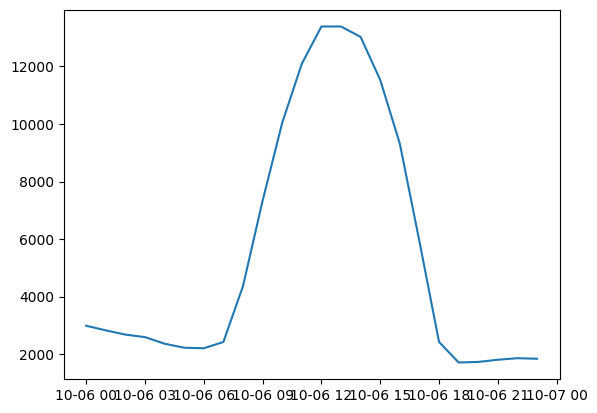

In [12]:
plt.plot(pv_df["Date"], pv_df["Production"])
plt.show()

In [13]:
c = data['data']['load']['limit'][:1]
d = data['data']['load']['limit'][0]
print(c.shape)
print(d.shape)

(1, 24, 10)
(24, 10)


In [14]:
import pandas as pd
import os


community_size = len(cg.get_community())
#num_generators = 2
num_generators = 1

data['data']['parameterData']['resources']['numGen'] = num_generators
data['data']['parameterData']['resources']['numLoad'] = community_size

data['data']['load']['limit'] = data['data']['load']['limit'][:community_size]
data['data']['load']['info'] = data['data']['load']['info'][:community_size]

data['data']['generator']['limit'] = data['data']['generator']['limit'][:num_generators]
data['data']['generator']['info'] = data['data']['generator']['info'][:num_generators]

for x in os.walk(path_steps_minutes):
    if x[0] is not path_steps_minutes:
        print(x[0])
        house_total_df = pd.read_csv(x[0] + '/total.csv', sep=';')
        house_total_df.columns = ['Date', 'Demand']
        house_total_df['Date'] = pd.to_datetime(house_total_df['Date'])
        house_total_df.set_index('Date')
        
        house_total_df = house_total_df.resample('1H', on='Date').mean()
                
        pos = int(x[0].split("house")[1])
        for y in range(len(data['data']['load']['limit'][pos])):
            data['data']['load']['limit'][pos][y][0] = house_total_df.iloc[y]["Demand"]/1000
            data['data']['load']['limit'][pos][y][1] = 0
            data['data']['load']['limit'][pos][y][2] = house_total_df.iloc[y]["Demand"]/1000*0.01
            data['data']['load']['limit'][pos][y][3] = house_total_df.iloc[y]["Demand"]/1000*0.01
            print(house_total_df.iloc[y]["Demand"])

output/minute\house0
134.11183333333332
134.11183333333332
134.11183333333332
134.11183333333332
134.11183333333332
134.11183333333332
165.22366666666667
122.07544444444444
254.72483333333332
175.72966666666665
237.93072222222224
484.4778611111111
173.71216666666666
156.41686111111113
149.3431111111111
172.1155277777778
187.17027777777778
165.93880555555555
117.50038888888889
939.546
164.01741666666666
177.2445833333333
172.24966666666666
163.94005555555557
output/minute\house1
1503.74175
511.32775000000004
257.4721388888889
193.72213888888888
134.91030555555554
103.0
166.8206111111111
134.91030555555557
134.91030555555557
186.9630277777778
187.46830555555556
153.15030555555555
183.671
171.4831111111111
374.5078055555556
328.35594444444445
157.21555555555557
177.27838888888888
186.56141666666664
537.3936111111111
350.0282222222222
152.52552777777777
161.90508333333335
134.91030555555557
output/minute\house2
203.11183333333332
203.11183333333332
203.11183333333335
203.11183333333332
203

In [15]:
#Add Production (Generator with type = 2 - Renewables)
for x in range(len(data['data']['generator']['limit'])):
    for y in range(len(data['data']['generator']['limit'][x])):
        if (x == 0):
            data['data']['generator']['limit'][x][y][0] = pv_df.iloc[y]["Wind_Production"]/1000
        #else:
            #data['data']['generator']['limit'][x][y][0] = 1


In [16]:
#for x in range(len(data['data']['load']['limit'])):
    #for y in range(len(data['data']['load']['limit'][x])):
        #data['data']['load']['limit'][x][y][1] = 0
        #print(house_total_df.iloc[y]["Demand"])
        

In [17]:
data['data']['generator']['limit']

array([[[2.99      , 0.        , 0.08      , 0.        , 4.5       ,
         0.        , 0.        , 0.        ],
        [2.82936808, 0.        , 0.08      , 0.        , 4.5       ,
         0.        , 0.        , 0.        ],
        [2.68221518, 0.        , 0.08      , 0.        , 4.5       ,
         0.        , 0.        , 0.        ],
        [2.5943363 , 0.        , 0.08      , 0.        , 4.5       ,
         0.        , 0.        , 0.        ],
        [2.3648982 , 0.        , 0.08      , 0.        , 4.5       ,
         0.        , 0.        , 0.        ],
        [2.22534474, 0.        , 0.08      , 0.        , 4.5       ,
         0.        , 0.        , 0.        ],
        [2.20667443, 0.        , 0.08      , 0.        , 4.5       ,
         0.        , 0.        , 0.        ],
        [2.29546358, 0.        , 0.08      , 0.        , 4.5       ,
         0.        , 0.        , 0.        ],
        [2.25349856, 0.        , 0.08      , 0.        , 4.5       ,
         0.

In [18]:
data['data']['load']['limit'][1]

array([[1.50374175e+00, 0.00000000e+00, 1.50374175e-02, 1.50374175e-02,
        0.00000000e+00, 0.00000000e+00, 5.00000000e-01, 6.00000000e-01,
        0.00000000e+00, 4.50000000e+00],
       [5.11327750e-01, 0.00000000e+00, 5.11327750e-03, 5.11327750e-03,
        0.00000000e+00, 0.00000000e+00, 5.00000000e-01, 6.00000000e-01,
        0.00000000e+00, 4.50000000e+00],
       [2.57472139e-01, 0.00000000e+00, 2.57472139e-03, 2.57472139e-03,
        0.00000000e+00, 0.00000000e+00, 5.00000000e-01, 6.00000000e-01,
        0.00000000e+00, 4.50000000e+00],
       [1.93722139e-01, 0.00000000e+00, 1.93722139e-03, 1.93722139e-03,
        0.00000000e+00, 0.00000000e+00, 5.00000000e-01, 6.00000000e-01,
        0.00000000e+00, 4.50000000e+00],
       [1.34910306e-01, 0.00000000e+00, 1.34910306e-03, 1.34910306e-03,
        0.00000000e+00, 0.00000000e+00, 5.00000000e-01, 6.00000000e-01,
        0.00000000e+00, 4.50000000e+00],
       [1.03000000e-01, 0.00000000e+00, 1.03000000e-03, 1.03000000e-03,
   

In [19]:
# Linearize the generator prices

# genCofA=data.generator.limit(:,:,6); -> MATLAB starts with 1, so we need the index -1
# genCofB=data.generator.limit(:,:,7);
# genCofC=data.generator.limit(:,:,8);

genCofA = data['data']['generator']['limit'][:, :, 5]
genCofB = data['data']['generator']['limit'][:, :, 6]
genCofC = data['data']['generator']['limit'][:, :, 7]

In [20]:
data['data']['generator']['limit'].shape

(1, 24, 8)

In [21]:
# Options for simulation

#options 
iterlim = 1000000000
reslim = 5000000000

In [22]:
# Definir o numero de resources usados

numGen = np.arange(1, data['data']['parameterData']['resources']['numGen'] + 1)
numLoad = np.arange(1, data['data']['parameterData']['resources']['numLoad'] + 1)
numPeriod = np.arange(1, data['data']['parameterData']['resources']['period'] + 1)
numBus = np.arange(1) # forced to 1
nOwner = np.arange(1, data['data']['parameterData']['resources']['owners'] + 1)

In [23]:
# Define as strings com os recursos para mandar para GAMS

gen = np.max(numGen)
Load = np.max(numLoad)
period = np.max(numPeriod)
Bus = np.max(numBus)

In [24]:
#% Definir as matrizes com os dados para o GAMS

# General Info
pMaxImp = data['data']['parameterData']['generalInfo']['P_Max_Imp']
pMaxExp = data['data']['parameterData']['generalInfo']['P_Max_Exp']
buyPrice = data['data']['parameterData']['generalInfo']['Energy_Buy_Price']
sellPrice = data['data']['parameterData']['generalInfo']['Energy_Sell_Price']

# Geradores
genLimit = data['data']['generator']['limit'][numGen[0]-1:numGen[-1]+1, numPeriod[0]-1:numPeriod[-1]+1, :]
genInfo = data['data']['generator']['info']

# Cargas
loadLimit = data['data']['load']['limit'][numLoad[0]-1:numLoad[-1]+1, numPeriod[0]-1:numPeriod[-1]+1, :]

In [25]:
# Definir os dados da rede para o GAMS

# Linhas
branchData = data['data']['network']['branch']

# Tensão Máxima
voltageMax = data['data']['parameterData']['network']['voltageMax']

# Tensão Mínima
voltageMin = data['data']['parameterData']['network']['voltageMin']

# Angulo Máximo
angleMax = data['data']['parameterData']['network']['angleMax']

# Angulo Mínimo
angleMin = data['data']['parameterData']['network']['angleMin']

# Definir a matriz das admitancias
ybus = data['data']['parameterData']['network']['ybus']
diag = data['data']['parameterData']['network']['diag']
branchID = data['data']['parameterData']['network']['branch']

In [26]:
#% Anular o custo fixo e quadratico da DG

genLimit[:, :, 3] = 0
genLimit[:, :, 5] = 0

#genLimit = np.append(genLimit, np.zeros(shape=(7, 24, 4)), axis=2)
genLimit = np.append(genLimit, np.zeros(shape=(num_generators, 24, 4)), axis=2)

# Not necessary anymore
#genLimit[:, :, 9] = 0
#genLimit[:, :, 11] = 0

In [27]:
#** Define the fixed sets structure to use in the parameters of the gams optimization process
#set genLimitInfo 'Indicate the number of columns of information from generators'
#/1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12/;

#set loadLimitInfo 'Indicate the number of columns of information from loads'
#/1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12/;

NCOLS = 12

genLimitInfo = np.arange(1, NCOLS+1)
loadLimitInfo = np.arange(1, NCOLS+1)


In [28]:
# * Define the several sets structure used in the gams optimization process, 
# these sets depends the number of resources used in matlab code

_t = np.arange(1, period+1)
_gen = np.arange(1, gen+1)
_Load = np.arange(1, Load+1)

In [29]:
# Aux function to convert numpy into dictionaries

def _auxDictionary(a):
    temp_dictionary = {}
    
    if len(a.shape) == 3:
        for dim0 in np.arange(a.shape[0]):
            for dim1 in np.arange(a.shape[1]):
                for dim2 in np.arange(a.shape[2]):
                    temp_dictionary[(dim0+1, dim1+1, dim2+1)] = a[dim0, dim1, dim2]
    elif len(a.shape) == 2:
        for dim0 in np.arange(a.shape[0]):
            for dim1 in np.arange(a.shape[1]):
                temp_dictionary[(dim0+1, dim1+1)] = a[dim0, dim1]
                
    else:
        for dim0 in np.arange(a.shape[0]):
            temp_dictionary[(dim0+1)] = a[dim0]
                
    return temp_dictionary

#temp_dict1 = _auxDictionary(loadLimit)

In [30]:
# Pyomo imports

import pyomo
import pyomo.opt
import pyomo.environ as pe

In [31]:
# Model creation

model = pe.ConcreteModel()

model.genLimitInfo = pe.Set(initialize=genLimitInfo, 
                            doc='Indicate the number of columns of information from generators')
model.loadLimitInfo = pe.Set(initialize=loadLimitInfo, 
                             doc='Indicate the number of columns of information from loads')

# Sets
model.t = pe.Set(initialize=_t, doc='period')
model.gen = pe.Set(initialize=_gen, doc='generators')
model.loads = pe.Set(initialize=_Load, doc='loads')

In [32]:
# Define the parameters with the data from the excel, such as limits, price, and voltage

model.loadLimit = pe.Param(model.loads, model.t, model.loadLimitInfo, 
                           initialize=_auxDictionary(loadLimit))

model.genLimit = pe.Param(model.gen, model.t, model.genLimitInfo,
                          initialize=_auxDictionary(genLimit))

model.genInfo = pe.Param(model.gen, model.genLimitInfo,
                         initialize=_auxDictionary(genInfo))

model.pMaxImp = pe.Param(model.t,
                         initialize=_auxDictionary(pMaxImp))

model.buyPrice = pe.Param(model.t,
                          initialize=_auxDictionary(buyPrice))

model.pMaxExp = pe.Param(model.t,
                         initialize=_auxDictionary(pMaxExp))

model.sellPrice = pe.Param(model.t,
                           initialize=_auxDictionary(sellPrice))

model.loadActPower = pe.Param(model.loads, model.t,
                              initialize=_auxDictionary(loadLimit[:, :, 0]))
model.optCost = pe.Var()#initialize=0)

In [33]:
# Define the variables for the gams optimization process
# variables fun, derCost, selfConso;

#model.fun = pe.Var(domain=pe.Reals, initialize=0)
model.derCost = pe.Var(domain=pe.Reals, initialize=0)
#model.selfConso = pe.Var(domain=pe.Reals, initialize=0)

In [34]:
#positive variables

model.genActPower = pe.Var(model.gen, model.t, domain=pe.PositiveReals, initialize=1)
model.genExcActPower = pe.Var(model.gen, model.t, domain=pe.PositiveReals, initialize=1)
model.pImp = pe.Var(model.t, domain=pe.PositiveReals, initialize=1)
model.pExp = pe.Var(model.t, domain=pe.PositiveReals, initialize=1)

In [35]:
# Load params
model.loadRedActPower = pe.Var(model.loads, model.t, domain=pe.PositiveReals, initialize=1)
model.loadCutActPower = pe.Var(model.loads, model.t, domain=pe.PositiveReals, initialize=1)
model.loadENS = pe.Var(model.loads, model.t, domain=pe.PositiveReals, initialize=1)

In [36]:
# binary variables

model.genXo = pe.Var(model.gen, model.t, domain=pe.Binary, initialize=0)
model.loadXo = pe.Var(model.loads, model.t, domain=pe.Binary, initialize=0)

In [37]:
# Default behaviour

default_behaviour = pe.Constraint.Skip

In [38]:
# Network constraints

def _maxImpEq(m, t):
    return m.pImp[t] <= m.pMaxImp[t] 

model.MaxImpEq = pe.Constraint(model.t, rule=_maxImpEq)

def _maxExpEq(m, t):
    return m.pExp[t] <= m.pMaxExp[t]

model.MaxExpEq = pe.Constraint(model.t, rule=_maxExpEq)

In [39]:
# Generator constraints with the active generation power

# Maximum generation in generators with normal contract
def _genActMaxEq1(m, g, t):
    if m.genInfo[g, 5] == 1:
        return (m.genActPower[g, t] <= m.genLimit[g, t, 1])
    return default_behaviour
    
model.genActMaxEq1 = pe.Constraint(model.gen, model.t, rule=_genActMaxEq1)

#*Minimum generation in generators with normal contract
def _genActMinEq(m, g, t):
    if m.genInfo[g, 5] == 1:
        return (m.genActPower[g, t] >= m.genInfo[g, 7] * m.genXo[g, t])
    return default_behaviour
    
model.genActMinEq = pe.Constraint(model.gen, model.t, rule=_genActMinEq)

#*Generation in generators with Feed-in tariffs
def _genActMaxEq2(m, g, t):
    if m.genInfo[g, 5] == 2:
        return (m.genActPower[g ,t] + m.genExcActPower[g, t] == m.genLimit[g, t, 1])
    return default_behaviour
    
model.genActMaxEq2 = pe.Constraint(model.gen, model.t, rule=_genActMaxEq2)

In [40]:
# Load constraints

def _loadReactEq(m, l, t):
    return m.loadRedActPower[l, t] <= m.loadLimit[l, t, 3]

model.loadReactEq = pe.Constraint(model.loads, model.t, rule=_loadReactEq)


def _loadCutActPowerEq(m, l, t):
    return m.loadCutActPower[l, t] == m.loadLimit[l, t, 4] * m.loadXo[l, t]

model.loadCutActPowerEq = pe.Constraint(model.loads, model.t, rule=_loadCutActPowerEq)


def _loadENSEq(m, l, t):
    return m.loadENS[l, t] + m.loadRedActPower[l, t] + m.loadCutActPower[l, t] <= m.loadActPower[l, t]

model.loadENSEq = pe.Constraint(model.loads, model.t, rule=_loadENSEq)

In [41]:
# Energy Balance

def _actBalanceEqSimple(m, t):
    temp_sum1 = sum([m.genActPower[i, t] - m.genExcActPower[i, t] for i in np.arange(1, m.gen.last()+1)])
    temp_sum2 = sum(m.loadActPower[:, t])
    
    return temp_sum1 + m.pImp[t] - m.pExp[t] - temp_sum2 == 0

#model.actBalanceSimple = pe.Constraint(model.t, rule=_actBalanceEqSimple)


def _actBalanceEq(m, t):
    temp_gens = sum([m.genActPower[g, t] - m.genExcActPower[g, t] for g in np.arange(1, m.gen.last()+1)])
    
    temp_loads = sum([m.loadActPower[l, t] - m.loadRedActPower[l, t] - m.loadCutActPower[l, t] - m.loadENS[l, t]
                      for l in np.arange(1, m.loads.last() + 1)])
    
    return temp_gens + m.pImp[t] - m.pExp[t] - temp_loads == 0
model.actBalanceSimple = pe.Constraint(model.t, rule=_actBalanceEq)

In [42]:
def _objFun(m):
    temp_gens = sum([m.genActPower[g, t] * m.genLimit[g, t, 3] + m.genExcActPower[g, t] * m.genLimit[g, t, 5]
                     for t in np.arange(1, m.t.last() + 1) for g in np.arange(1, m.gen.last()+1)])
    
    temp_loads = sum([m.loadRedActPower[l, t] * m.loadLimit[l, t, 7] + m.loadCutActPower[l, t] * m.loadLimit[l, t, 8] + m.loadENS[l, t] * m.loadLimit[l, t, 10] 
                      for t in np.arange(1, m.t.last() + 1) for l in np.arange(1, m.loads.last() + 1)])
    
    temp_rest = sum([m.pImp[t] * m.buyPrice[t] - m.pExp[t] * m.sellPrice[t] for t in np.arange(1, m.t.last() + 1)])

    m.derCost = temp_gens + temp_loads + temp_rest
    
    return temp_gens + temp_loads + temp_rest

model.ObjFun = pe.Objective(rule=_objFun, sense=pe.minimize)

In [43]:
# Create model instance and solve

import cplex
from pyomo.opt import SolverFactory

model.write('res_V4_EC.lp',  io_options={'symbolic_solver_labels': True})

# Create a solver
#opt = pe.SolverFactory('cplex', executable='C:/Program Files/IBM/ILOG/CPLEX_Studio_Community221/cplex/bin/x64_win64/cplex.exe')
opt = pe.SolverFactory('ipopt', executable='C:/Program Files/Ipopt-3.11.1-win64-intel13.1/bin/ipopt.exe')
#opt.options['LogFile'] = 'res_V4_EC.log'
opt.options['print_level'] = 12
opt.options['output_file'] = "res_V5_EC.log"

results = opt.solve(model)#, tee=True)
results.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 480
  Number of variables: 576
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.11.1\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 3.232086181640625
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


In [44]:
# Extract Pyomo values
# https://stackoverflow.com/questions/67491499/how-to-extract-indexed-variable-information-in-pyomo-model-and-build-pandas-data

def ext_pyomo_vals(vals):
    # make a pd.Series from each 
    s = pd.Series(vals.extract_values(),
                  index=vals.extract_values().keys())
    
    # if the series is multi-indexed we need to unstack it...
    if type(s.index[0]) == tuple:    # it is multi-indexed
        s = s.unstack(level=1)
    else:
        # force transition from Series -> df
        s = pd.DataFrame(s)
        
    return s

In [45]:
# Result extraction

# Generation
result_genActPower = ext_pyomo_vals(model.genActPower)
result_genExcActPower = ext_pyomo_vals(model.genExcActPower)

# Imports/Exports
result_pimp = ext_pyomo_vals(model.pImp)
result_pexp = ext_pyomo_vals(model.pExp)

# Loads
result_loadRedActPower = ext_pyomo_vals(model.loadRedActPower)
result_loadCutActPower = ext_pyomo_vals(model.loadCutActPower)
result_loadENS = ext_pyomo_vals(model.loadENS)

# Booleans
result_genXo = ext_pyomo_vals(model.genXo)
result_loadXo = ext_pyomo_vals(model.loadXo)

In [46]:
# Turn to pandas and save results

# Gens
pd_genActPower = pd.DataFrame(result_genActPower)
pd_genActPower.to_csv('results/cplex_pyomo/genActPower.csv', index=None)

pd_genExcActPower = pd.DataFrame(result_genExcActPower)
pd_genExcActPower.to_csv('results/cplex_pyomo/genExcActPower.csv', index=None)

# Import/Export
pd_pimp = pd.DataFrame(result_pimp)
pd_pimp.to_csv('results/cplex_pyomo/pimp.csv', index=None)

pd_pexp = pd.DataFrame(result_pexp)
pd_pexp.to_csv('results/cplex_pyomo/pexp.csv', index=None)

# Loads
pd_loadRedActPower = pd.DataFrame(result_loadRedActPower)
pd_loadRedActPower.to_csv('results/cplex_pyomo/loadRedActPower.csv', index=None)

pd_loadCutActPower = pd.DataFrame(result_loadCutActPower)
pd_loadCutActPower.to_csv('results/cplex_pyomo/loadCutActPower.csv', index=None)

pd_loadENS = pd.DataFrame(result_loadENS)
pd_loadENS.to_csv('results/cplex_pyomo/loadENS.csv', index=None)


# Booleans
pd_genXo = pd.DataFrame(result_genXo)
pd_genXo.to_csv('results/cplex_pyomo/genXo.csv', index=None)

pd_loadXo = pd.DataFrame(result_loadXo)
pd_loadXo.to_csv('results/cplex_pyomo/loadXo.csv', index=None)

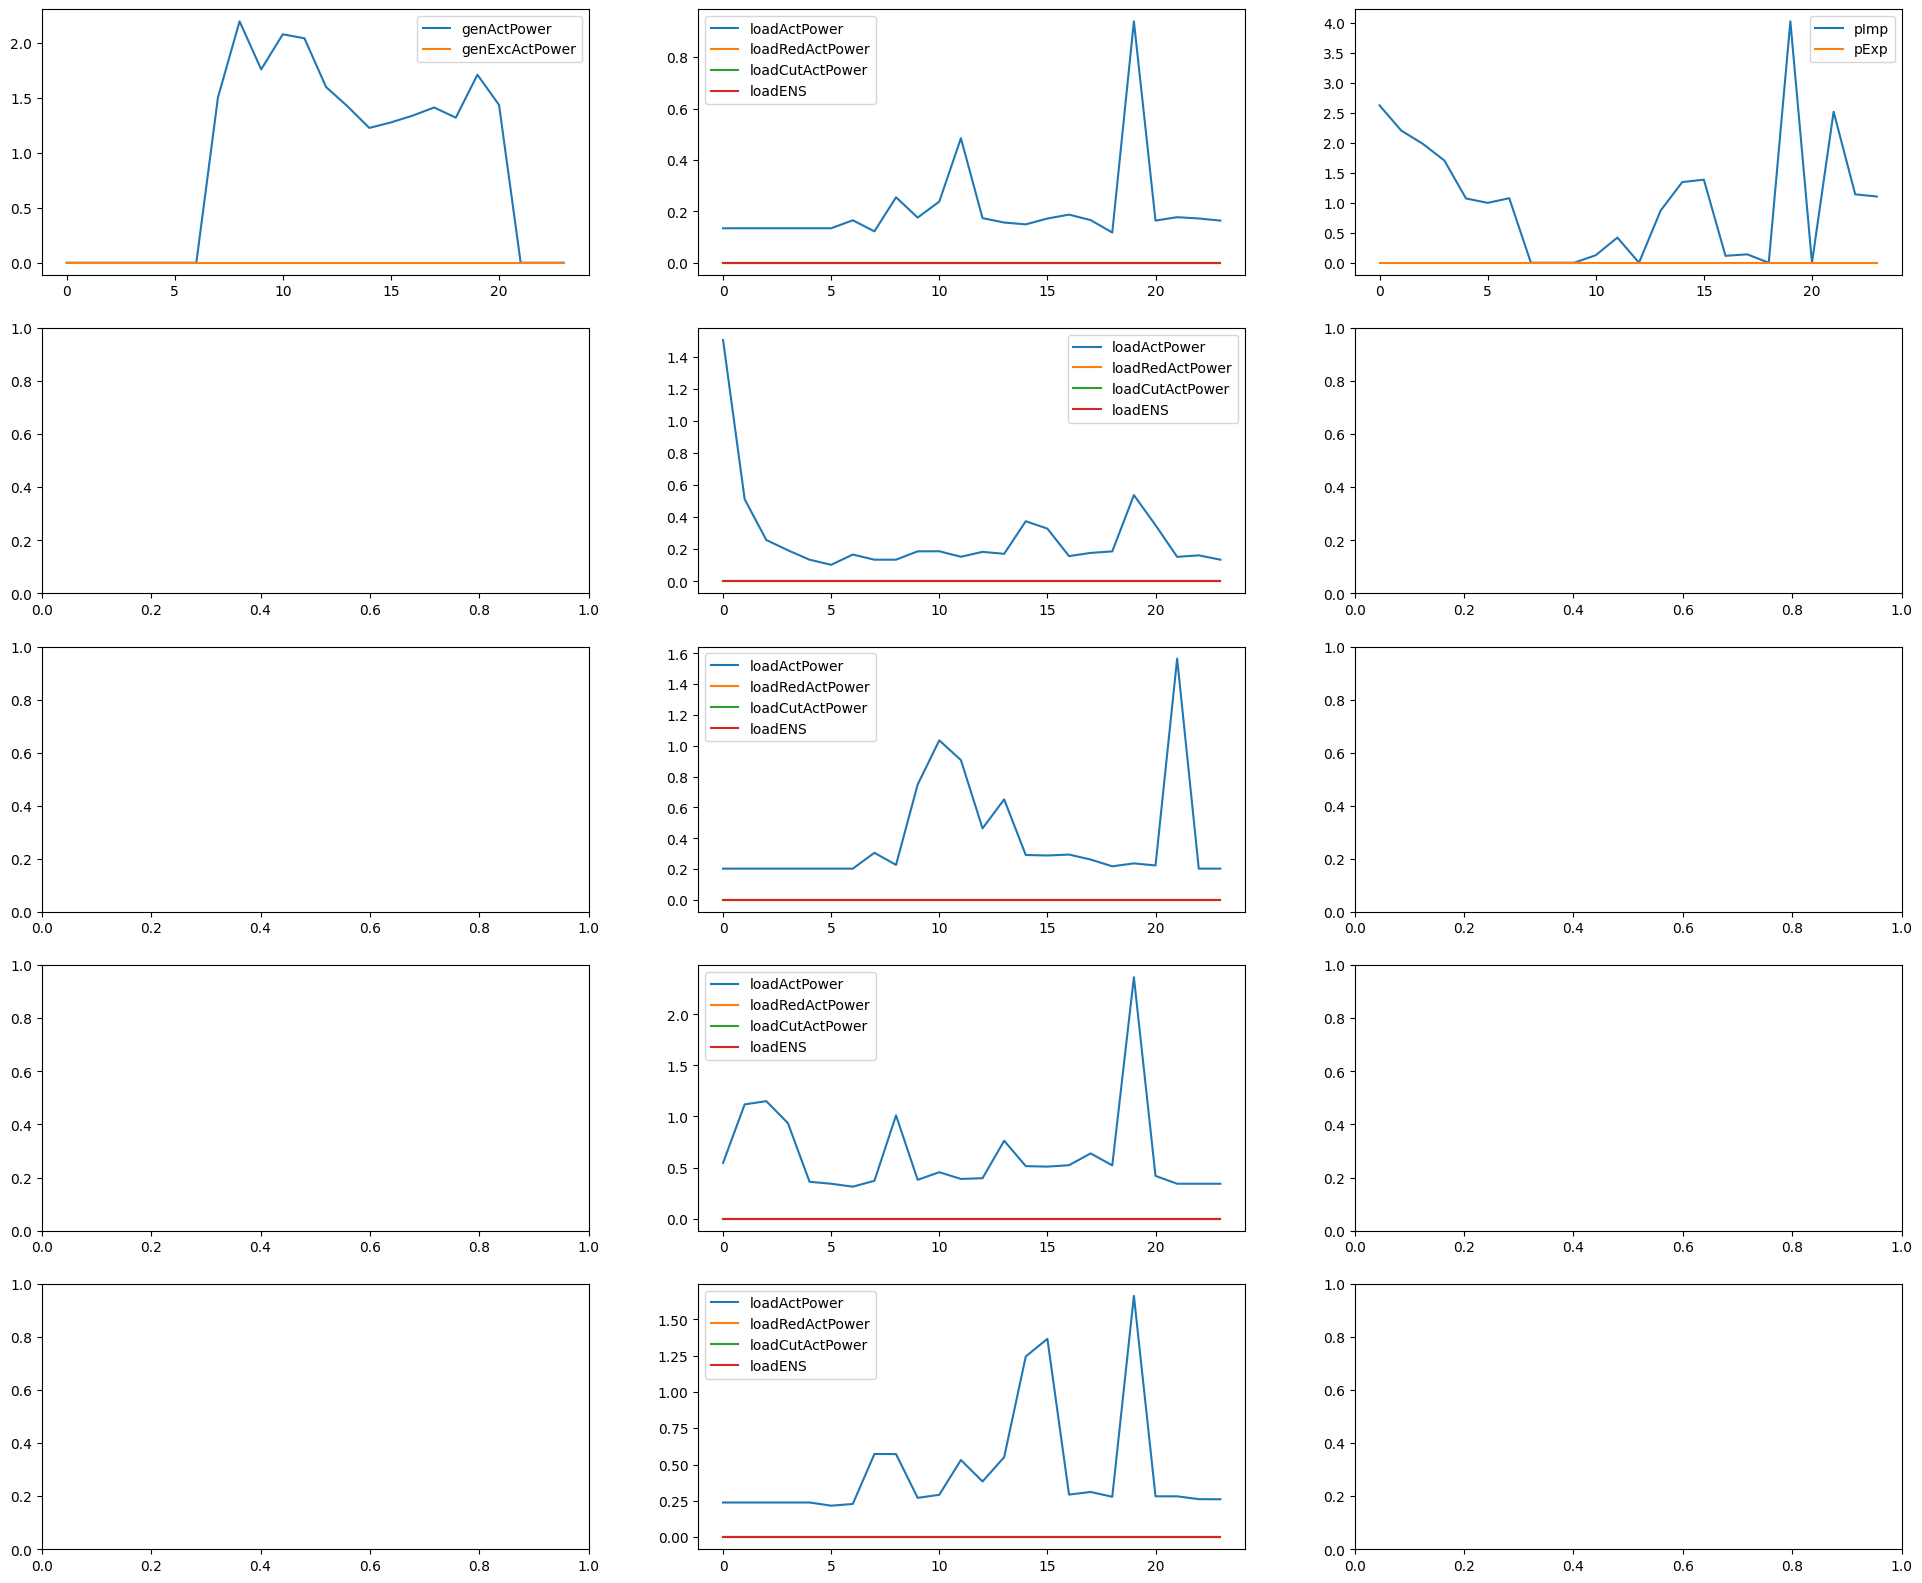

In [47]:
# Plot results

fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(24, 20))

for i in np.arange(num_generators):
    # Generators
    axs[i, 0].plot(result_genActPower.values[i])
    axs[i, 0].plot(result_genExcActPower.values[i])
    axs[i, 0].legend(['genActPower', 'genExcActPower'])
    
for i in np.arange(5):
    # Loads
    axs[i, 1].plot(loadLimit[:, :, 0][i, :])
    axs[i, 1].plot(result_loadRedActPower.values[i])
    axs[i, 1].plot(result_loadCutActPower.values[i])
    axs[i, 1].plot(result_loadENS.values[i])
    axs[i, 1].legend(['loadActPower', 'loadRedActPower', 'loadCutActPower', 'loadENS'])


axs[0, 2].plot(result_pimp.values)
axs[0, 2].plot(result_pexp.values)
axs[0, 2].legend(['pImp', 'pExp'])


plt.show()

In [48]:
# Total import costs

print('Total import cost: {}'.format(sum(result_pimp.values.ravel() * buyPrice)))

Total import cost: 1.9427970039486722
